Notebook to analyze the performance of the invertible neural network trained with dvar = (Vtot, Rmedian, GSD, n, k), qoi = (F11, PPF)

In [12]:
import os
import argparse
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import PyMieScatt as pms
from analyzing_functions import *

In [13]:
datafile = '/data/project/general/aerosolretriev/aerosol_data/dataset_15_08_2022/data/data_train_trunc_fw.h5'

In [4]:
pymiescatt_df = pd.read_hdf('/data/project/general/aerosolretriev/aerosol_data/dataset_20_10_2022/data_meas_pms.h5',key='qoi')
datafile= '/data/project/general/aerosolretriev/aerosol_data/real_measurement_data_october2022/uneph_data_20221024_values.h5'

predictedfile = '/data/project/general/aerosolretriev/aerosol_results_november_2022/results_18_11_2022/invertible_model_GSD120/plots/modelinvertible_model/measurement_data_pred_dvar.csv'
directory ='/data/project/general/aerosolretriev/aerosol_results_november_2022/results_18_11_2022/invertible_model_GSD120/plots/modelinvertible_model'



In [14]:
qoi_test_meas = pd.read_hdf(datafile,'qoi')
dvar_test_meas = pd.read_hdf(datafile,'dvar')
dvar_pred = pd.read_csv(predictedfile)

In [15]:
qoi_test_meas

Vtot     RmedianV       GSD         n         k
0        24.686724   271.608378  1.678992  2.203725  1.562441
1         8.599283  3217.158187  2.889001  1.817602  1.925480
2        68.896084  1561.974692  2.606272  1.516829  0.928299
3        35.798408   459.228202  1.562343  2.401332  2.067126
4         7.691980  1447.109619  2.551337  1.733772  0.911320
...            ...          ...       ...       ...       ...
79995    40.331281  2288.887415  1.705406  2.144263  0.555140
79996  4983.359159   161.273862  2.678931  1.633944  1.934613
79997   239.151999   219.176888  2.211569  2.194552  0.551891
79998   823.119482  1210.363792  1.933004  1.698477  0.900215
79999    19.244051   840.439577  2.938540  1.565685  0.417871

[80000 rows x 5 columns]

In [6]:
dvar_pred = dvar_pred.drop(['Unnamed: 0'], axis = 1)

In [7]:
dvar_pred

Vtot  RmedianV     GSD             n       k
0     1.6820    0.0974  1.1253  1.484100e+00  0.1708
1     1.9646    0.1808  1.1347  1.343900e+00  0.0000
2     0.5871    0.2520  1.0688  3.486284e+29  0.0002
3     2.6469    3.6693  1.0170  1.334900e+00  0.0001
4   590.9649   29.9995  1.4386  1.529800e+00  0.0016
5     2.6792    0.0707  1.2978  1.331200e+00  1.7909
6     1.7671    0.1054  1.1814  1.673600e+00  0.0824
7     4.6892    0.2144  1.1396  1.468500e+00  0.0406
8     2.2312    0.2422  1.1172  2.712330e+01  4.4108
9     4.0831    0.1956  1.1332  1.650600e+00  0.3133
10    7.3204    9.7584  1.0144  1.550900e+00  0.0069
11    0.4214    0.1074  1.0252  1.361200e+00  1.3762
12    5.4557    0.3518  1.0613  1.348500e+00  0.4352
13    2.1501    0.4573  1.2714  1.343400e+00  1.1330

In [8]:
F11_list_test = [x for x in qoi_test_meas.columns if 'F11' in x]
PPF_list_test = [x for x in qoi_test_meas.columns if 'PPF' in x]

In [9]:
angles1 = np.arange(10,86)
angles2 = np.arange(95,171)
angles = np.concatenate([angles1, angles2])

In [10]:
D_array = np.logspace(0.1, 5, 300)  # [nm] base 10
theta = np.arange(0,181,1)

In [11]:
newcolumns = []
F11_newcolumns = []
PPF_newcolumns = []
for i in range(0,181):
    newcolumns.append('F11_'+str(i))
    F11_newcolumns.append('F11_'+str(i))
for j in range(0,181):
    newcolumns.append('PPF_'+str(j))
    PPF_newcolumns.append('PPF_'+str(j))


In [8]:
theta_meas = []
for i in range(10,86):
    theta_meas.append(i)
for i in range(95,171):
    theta_meas.append(i)

In [2]:
dvar_pred

NameError: name 'dvar_pred' is not defined

In [18]:
pymiescatt_pred = pd.DataFrame(columns = newcolumns)

for index in range(14):
    param_tmp = dvar_pred.iloc[index]
    DmedianV_tmp = param_tmp['RmedianV']*2  # [um]
    GSD_tmp = param_tmp['GSD']
    Vtot_tmp = param_tmp['Vtot']
    n_tmp = param_tmp['n']
    k_tmp = param_tmp['k']
    DmedianN_tmp = (np.exp(np.log(DmedianV_tmp) - (3*np.log(GSD_tmp)**2))) *1e3   # [nm]
    Ntot_tmp = 6 / np.pi * Vtot_tmp*1e9 / (np.exp((3*np.log(DmedianN_tmp)) + (4.5*np.log(GSD_tmp)**2))) # [cm^-3]
    print(DmedianN_tmp)
    print(Ntot_tmp)
    pms_hdf = run_pymiescatt(DmedianN_tmp/2*1e-3, GSD_tmp, Ntot_tmp, n_tmp, k_tmp, 0.532, theta, D_array)
    pymiescatt_pred.loc[index]=np.concatenate([pms_hdf['F11'].T.values,pms_hdf['PPF'].T.values])
   

186.82385475053988
462.6956828218058
344.6852865046926
85.2704916281386


KeyboardInterrupt: 

In [20]:
pymiescatt_pred

F11_0    F11_1     F11_2     F11_3     F11_4     F11_5     F11_6  \
0  0.900221  0.90001  0.899377  0.898323  0.896851  0.894961  0.892658   

      F11_7     F11_8     F11_9  ...   PPF_171   PPF_172   PPF_173   PPF_174  \
0  0.889945  0.886826  0.883307  ...  0.015777  0.012456  0.009531  0.006998   

    PPF_175   PPF_176   PPF_177   PPF_178   PPF_179  PPF_180  
0  0.004857  0.003108  0.001747  0.000776  0.000194     -0.0  

[1 rows x 362 columns]

KeyError: 1

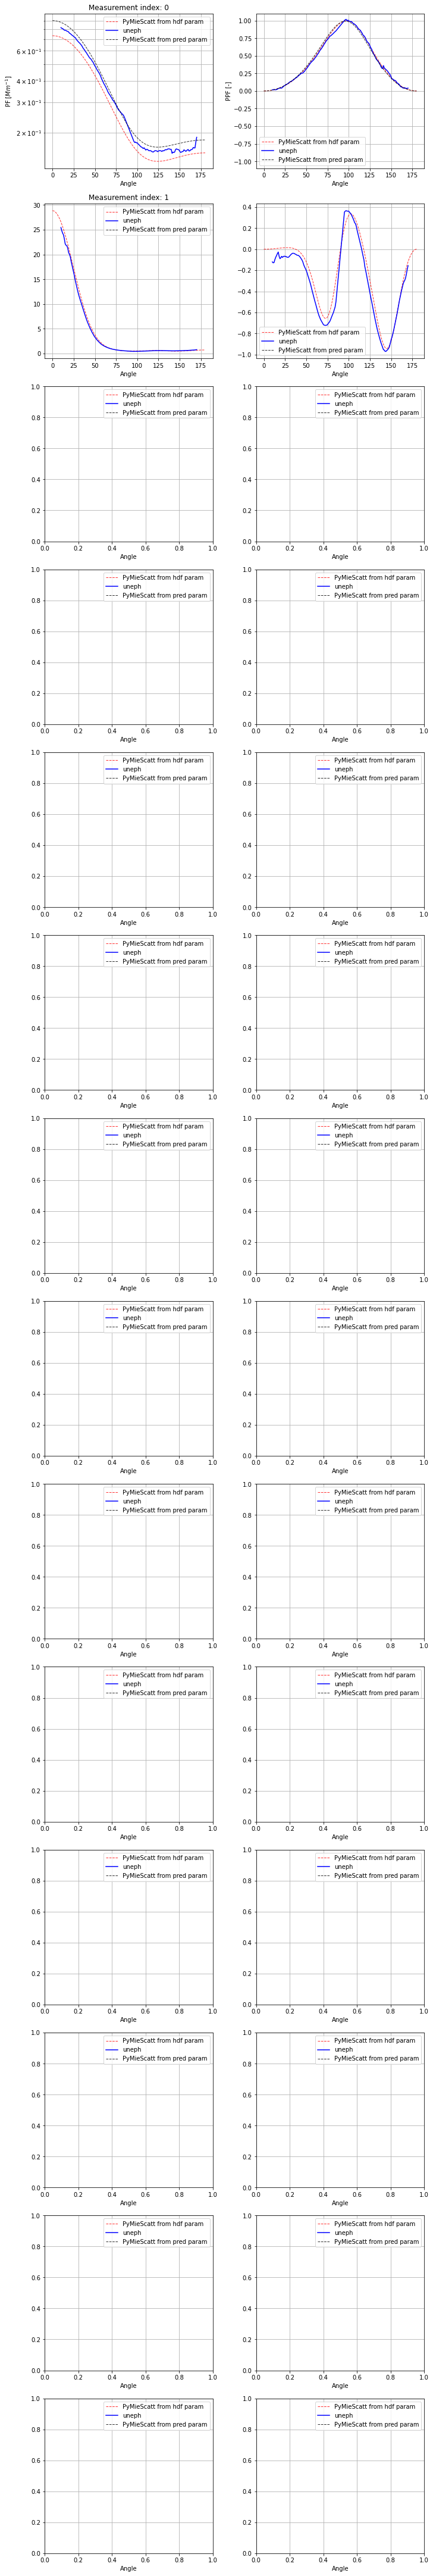

In [19]:
fig, axs = plt.subplots(ncols=2, nrows=14, figsize=(10, 60), constrained_layout=True)
for index in range(14):
    axs[index,0].set_title('Measurement index: '+str(index))

    pms_hdf_plot, = axs[index,0].plot(theta, pymiescatt_df[F11_newcolumns].loc[index], ls='--', lw='1', c='r', alpha=0.8, label='PyMieScatt from hdf param')
    pms_hdf_plot, = axs[index,1].plot(theta, pymiescatt_df[PPF_newcolumns].loc[index], ls='--', lw='1', c='r', alpha=0.8, label='PyMieScatt from hdf param')

    meas_hdf_plot, = axs[index,0].plot(theta_meas, qoi_test_meas[F11_list_test].loc[index].values/4/np.pi, c= 'b', label = 'uneph')
    meas_hdf_plot, = axs[index,1].plot(theta_meas, qoi_test_meas[PPF_list_test].loc[index].values, c= 'b', label = 'uneph')
    
    pms_pred_plot, = axs[index,0].plot(theta, pymiescatt_pred[F11_newcolumns].loc[index], ls='--', lw='1', c='k', alpha=0.8, label='PyMieScatt from pred param')
    pms_pred_plot, = axs[index,1].plot(theta, pymiescatt_pred[PPF_newcolumns].loc[index], ls='--', lw='1', c='k', alpha=0.8, label='PyMieScatt from pred param')


    axs[index,0].set_ylabel('PF [$Mm^{-1}$]')
    axs[index,1].set_ylabel('PPF [-]')
    axs[index,1].set_ylim(-1.1, 1.1)
    axs[index,0].set_yscale('log')
    for ax in axs.reshape(-1):
        ax.set_xlabel('Angle')
        ax.legend(handles=[pms_hdf_plot,meas_hdf_plot, pms_pred_plot])
        ax.grid(which='both')
fig.savefig(f'{directory}/pymiescatt_measurements_trial.jpg')

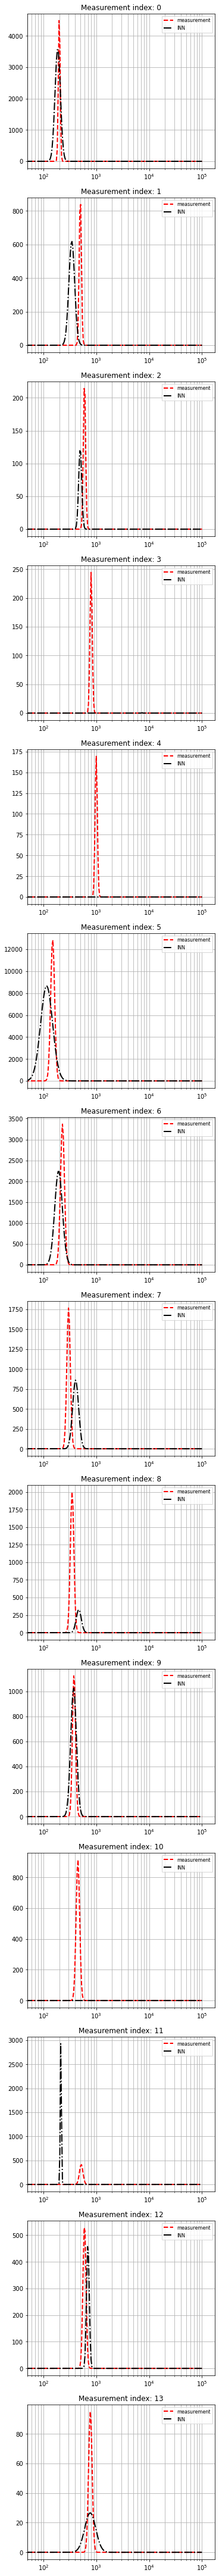

In [15]:
fig, axs = plt.subplots(ncols=1, nrows=14, figsize=(5, 60), constrained_layout=True)
for index in range(14):
    param_tmp = dvar_test_meas.iloc[index]
    DmedianV_tmp = param_tmp['RmedianV']*2  # [um]
    GSD_tmp = param_tmp['GSD']
    Vtot_tmp = param_tmp['Vtot']
    DmedianN_tmp = (np.exp(np.log(DmedianV_tmp) - (3*np.log(GSD_tmp)**2))) *1e3   # [nm]
    Ntot_tmp = 6 / np.pi * Vtot_tmp*1e9 / (np.exp((3*np.log(DmedianN_tmp)) + (4.5*np.log(GSD_tmp)**2))) # [cm^-3]
    axs[index].plot(D_array, lognormal(D_array,DmedianN_tmp,GSD_tmp,Ntot_tmp ), c='r', ls='--', lw=2, label='measurement')
                    
                    
    param_tmp_pred = dvar_pred.iloc[index]
    DmedianV_tmp_pred = param_tmp_pred['RmedianV']*2  # [um]
    GSD_tmp_pred = param_tmp_pred['GSD']
    Vtot_tmp_pred = param_tmp_pred['Vtot']
    DmedianN_tmp_pred = (np.exp(np.log(DmedianV_tmp_pred) - (3*np.log(GSD_tmp_pred)**2))) *1e3   # [nm]
    Ntot_tmp_pred = 6 / np.pi * Vtot_tmp_pred*1e9 / (np.exp((3*np.log(DmedianN_tmp_pred)) + (4.5*np.log(GSD_tmp_pred)**2))) # [cm^-3]
    axs[index].plot(D_array, lognormal(D_array,DmedianN_tmp_pred,GSD_tmp_pred,Ntot_tmp_pred ),ls='-.', c='k', lw=2, label='INN')
    axs[index].set_xscale('log')
    axs[index].legend(fontsize=8)
    axs[index].set_xlim(50, )
    axs[index].grid(which='both')
    axs[index].set_title('Measurement index: '+str(index)) 
fig.savefig(f'{directory}/pymiescatt_measurements_size_distr_trial.jpg')

In [ ]:
dvar_pred.to_hdf(f'{directory}/meas_data_pred.h5',key='dvar')    
pymiescatt_df.to_hdf(f'{directory}/meas_data_pred.h5',key='qoi')   
